In [14]:
%matplotlib inline
from scipy.io import loadmat
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm

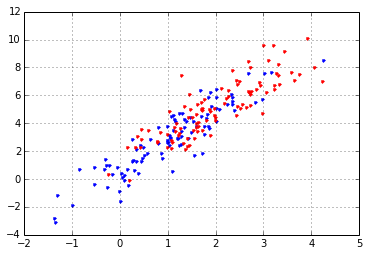

In [24]:
np.random.seed(12345)
nd = 100
x1p = np.random.randn(nd)+1
x1n = np.random.randn(nd)+2

x2p = x1p *2 + 1 + np.random.randn(nd)
x2n = x1n *2 + 1 + np.random.randn(nd)

x1 = np.concatenate([x1p, x1n])
x2 = np.concatenate([x2p, x2n])

xs = np.vstack([x1, x2]) #now the index for data point is the second index.
ys = np.concatenate([[1]*nd, [-1]*nd])
plt.plot(x1[ys>0], x2[ys>0], '.b')
plt.plot(x1[ys<0], x2[ys<0], '.r')
plt.grid(True)


1) Normalize the data so that the mean of each feature is 0 and standard deviation of each feature is 1.

In [25]:
def normalize(xs):
    mean = np.mean(xs, axis = 1)
    norm_xs = xs - mean[:,np.newaxis]
    norm_xs = norm_xs / np.std(norm_xs, axis = 1)[:, np.newaxis]
    return norm_xs

In [26]:
nxs = normalize(xs)
print np.mean(nxs, axis = 1)
print np.std(nxs, axis = 1)

[ -5.02375919e-16   5.40123501e-16]
[ 1.  1.]


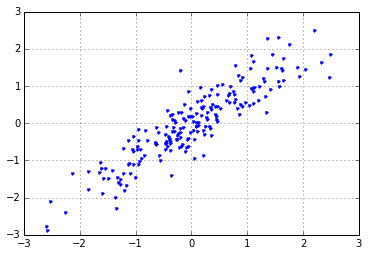

In [39]:
def plot_data(xs):
    plt.plot(xs[0], xs[1], '.')
    plt.grid(True)
plot_data(nxs)

2) What is the criteria for picking better axis?

3) What is the size of the covariance matrix? Why?

In [37]:
def cov(nxs):
#     r = len(nxs)
#     c = len(nxs[0])
#     cm = np.zeros((r, r))
#     for i in xrange(r):
#         for j in xrange(r):
#             cm[i][j] = sum(nxs[i] * nxs[j])/c
#     return cm
# --------------------------------------------------------
    return np.dot(nxs, nxs.T)/len(nxs[0])

covMat = cov(nxs) # or np.cov(nxs)
print covMat

[[ 1.          0.90553179]
 [ 0.90553179  1.        ]]


4) Find eigenvalue and eigenvector of the covariance matrix.

In [41]:
evals, evecs = np.linalg.eigh(covMat)

5) Draw the eigenvectors on the plot.

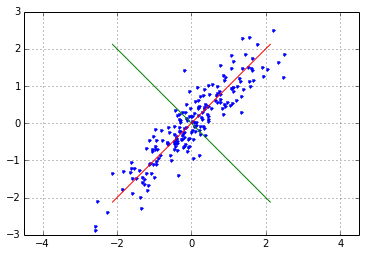

In [43]:
plot_data(nxs)
t = np.linspace(-3, 3)
vs = evecs[0] * t[:, np.newaxis]
vs = vs.T
plt.plot(vs[0], vs[1])

vs = evecs[1] * t[:, np.newaxis]
vs = vs.T
plt.plot(vs[0], vs[1])

plt.axes().set_aspect('equal', 'datalim')

6) Use eigenvector and compute the transformed feature vector.

In [47]:
newxs = np.dot(evecs, nxs)

7) Plot transformed data point.

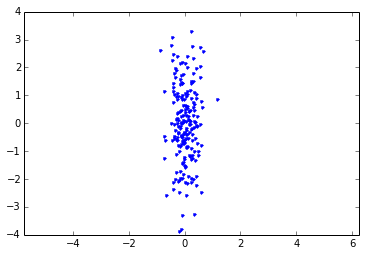

In [49]:
plt.plot(newxs[0], newxs[1], '.')
plt.axes().set_aspect('equal', 'datalim')

# Handwritten Digit Recognition.

In [5]:
D = loadmat('usps_resampled/usps_resampled.mat')
print D
#it is a dictionary of four elements
# train_labels for the number of each training image
# train_patterns for the train images
# test_labels
# test_patterns

{'train_labels': array([[-1,  1, -1, ..., -1, -1, -1],
       [-1, -1,  1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1,  1, -1],
       ..., 
       [-1, -1, -1, ..., -1, -1,  1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ...,  1, -1, -1]], dtype=int16), 'test_labels': array([[ 1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       ..., 
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ...,  1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1]], dtype=int16), 'train_patterns': array([[-0.99999988, -0.99999982, -0.99999988, ..., -0.9999997 ,
        -0.99997759, -0.99993992],
       [-0.9999997 , -0.99999845, -0.99999988, ..., -0.99996912,
        -0.99797225, -0.99719542],
       [-0.99998665, -0.99989259, -0.99999988, ..., -0.9983288 ,
        -0.96142083, -0.95687085],
       ..., 
       [-0.93985581, -0.76438236, -0.99999988, ..., -0.99999988,
        -0.97830033, -0.99999988],
       [-0.99104893, -0.9

In [6]:
#train_labels is in a funny format too
#here is how to use it
labels = D['train_labels'].T
#this is how they represent 6
print labels[0] 
print labels[0,6]

def make_class(c):
    return list(c).index(1)
labels = np.array([make_class(lb) for lb in labels])
print labels #more readable

[-1 -1 -1 -1 -1 -1  1 -1 -1 -1]
1
[6 0 1 ..., 9 2 7]


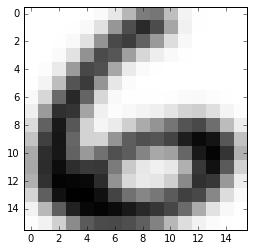

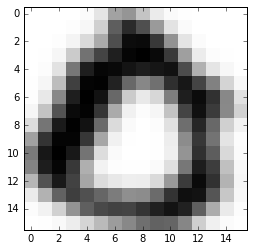

In [7]:
images = D['train_patterns']
def show(img):
    im = img.reshape(16,16) #you can try print it
    plt.imshow(im, interpolation='nearest', cmap=cm.Greys)
    
show(images[:,0])
plt.figure()
show(images[:,1])